# Multiple Linear Regression

Importing Necessary Libraries and Loading Dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Encoding Categorial Variables

In [3]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cat = encoder.fit_transform(df[['Extracurricular Activities']])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['Extracurricular Activities']))

X = pd.concat([df.drop(['Extracurricular Activities', 'Performance Index'], axis=1), encoded_df], axis=1)
y = df['Performance Index']

Split Into Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the Model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prediction and Evaluation

In [6]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 4.105609215835834
R² Score: 0.9880686410711422
Coefficients: [2.85191442 1.01886667 0.47682996 0.18776637 0.66530347]
Intercept: -34.07520822521337


Visualization

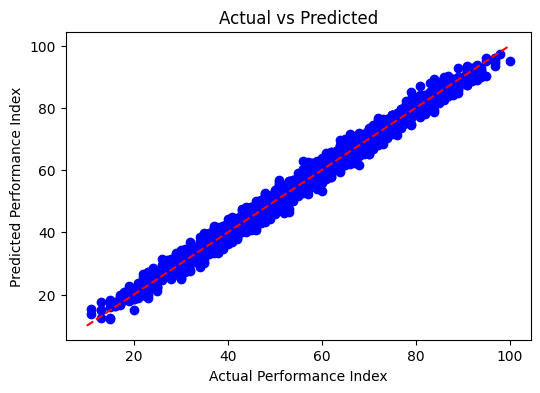

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()